# Homework I

Joana Peixinho (ist1103335) & Miguel Fernandes (ist1103573)

## I. Pen and Paper [11v]

Consider the partially learnt decision tree from the dataset 𝐷. 𝐷 is described by four input variables –
one numeric with values in [0,1] and 3 categorical – and a target variable with three classes.

![Decision Tree](./decision_tree.png)


### 1) [5v] Complete the given decision tree using Information gain with Shannon entropy (log2).
Consider that: i) a minimum of 4 observations is required to split an internal node, and 
ii) decisions by ascending alphabetic order should be placed in case of ties.

### 2) [2.5v] Draw the training confusion matrix for the learnt decision tree

|        | True A | True B | True C |
|--------|--------|--------|--------|
| Pred A |   4    |   1    |   0    |
| Pred B |   0    |   2    |   0    |
| Pred C |   0    |   1    |   4    |


### 3) [1.5v] Identify which class has the lowest training F1 score.

### 4) [1v] Considering y2 to be ordinal, assess if y1 and y2 are correlated using the Spearman coefficient

In [1]:
import scipy.stats

# (ranks) of y1 and y2
rank_y1 = [3, 2, 1, 5, 4, 10, 12, 11, 7, 9, 6, 8]
rank_y2 = [8, 11, 3.5, 3.5, 3.5, 11, 3.5, 11, 8, 3.5, 8, 3.5]

# Spearman's correlation coefficient
rho, p_value = scipy.stats.spearmanr(rank_y1, rank_y2)

print("Spearman's correlation coefficient:", rho)

Spearman's correlation coefficient: 0.07965868656654054
P value: 0.8056140963493688


### 5) [1v] Draw the class-conditional relative histograms of y1 using 5 equally spaced bins in [0,1].
Challenge: find the root split using the discriminant rules from these empirical distributions.

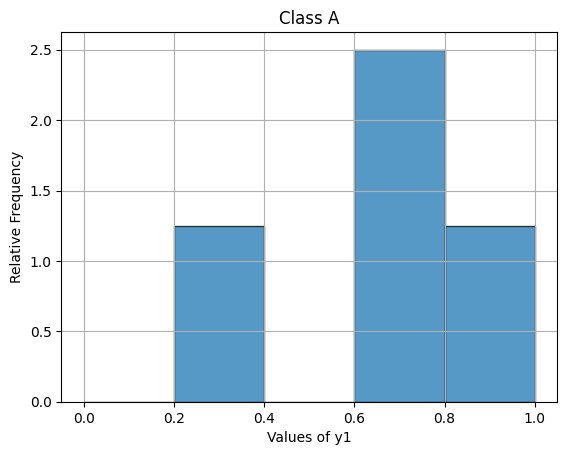

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data for y1
y1 = np.array([0.24,2,2,2,2,0.68,0.9,0.76,2,2,2,2])
num_bins = 5  # Number of bins (intervals)

# Create the histogram of relative frequency
plt.hist(y1, bins=num_bins, range=(0, 1), density=True, alpha=0.75, edgecolor='k', weights=np.ones_like(y1) / len(y1))

plt.xlabel('Values of y1')
plt.ylabel('Relative Frequency')
plt.title('Class A')
plt.grid(True)

plt.show()


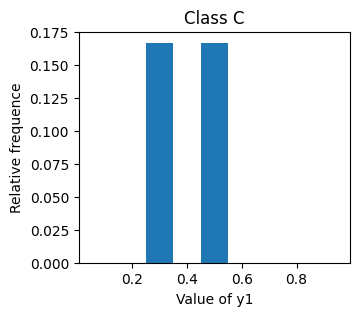

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = [2, 2, 2, 0.36, 0.32, 2, 2, 2, 2, 2, 0.44, 0.52] # [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

# Define the number of bins
num_bins = 5

# Create histogram
hist, bins = np.histogram(data, bins=num_bins, range=(0, 1))

# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate total count
total_count = len(data)

# Convert counts to fractions
hist_fraction = hist / total_count

# Set the figure size to make it less wide
plt.figure(figsize=(3.5, 3))  # Adjust the width and height here


# Plot the histogram
plt.bar(bin_centers, hist_fraction, width=0.1)

# Set labels and title
plt.xlabel('Value of y1')
plt.ylabel('Relative frequence')
plt.title('Class C')

# Show the plot
plt.show()


## Programming [9v]

**Considering the `column_diagnosis.arff` dataset available at the homework tab:**

In [3]:
#Load the data

import pandas as pd
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')


### 1) [1.5v]

**Apply f_classif from sklearn to assess the discriminative power of the input variables.
Identify the input variable with the highest and lowest discriminative power. 
Plot the class-conditional probability density functions of these two input variables.**

The variable with the highest F-score is degree_spondylolisthesis with a score of 119.12288060759764
The variable with the lowest F-score is pelvic_radius with a score of 16.86693475538006
     degree_spondylolisthesis  pelvic_radius   class
0                   -0.254400      98.672917  Hernia
1                    4.564259     114.405425  Hernia
2                   -3.530317     105.985135  Hernia
3                   11.211523     101.868495  Hernia
4                    7.918501     108.168725  Hernia
..                        ...            ...     ...
305                 -4.245395     117.449062  Normal
306                 -0.421010     114.365845  Normal
307                 -2.707880     125.670725  Normal
308                  0.214750     118.545842  Normal
309                 -0.199249     123.945244  Normal

[310 rows x 3 columns]
    degree_spondylolisthesis  pelvic_radius   class
0                  -0.254400      98.672917  Hernia
1                   4.564259     114.405425  He

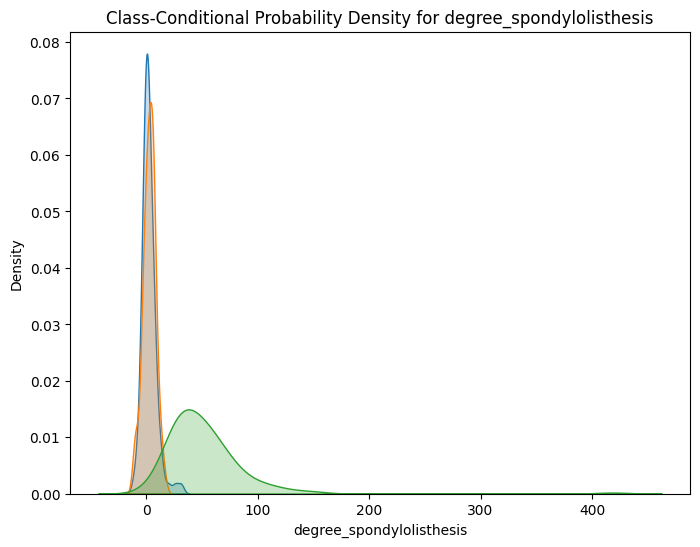

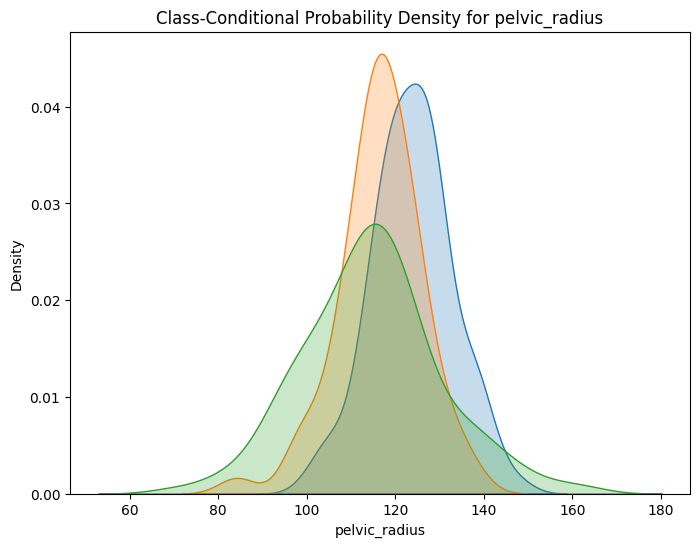

In [4]:
try:
    import sklearn
except ImportError:
    !pip install scikit-learn
    import sklearn

from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns 

X = df.drop('class', axis=1)
y = df['class']

fimportance = f_classif(X, y)
highest_score = fimportance[0].argmax()
highest_feature = X.columns.values[highest_score]
lowest_score = fimportance[0].argmin()
lowest_feature = X.columns.values[lowest_score]

print('The variable with the highest F-score is', highest_feature, \
      'with a score of', fimportance[0][highest_score])
print('The variable with the lowest F-score is', lowest_feature,\
       'with a score of', fimportance[0][lowest_score])


top_2_features = [highest_feature, lowest_feature]

plot_df = df[top_2_features + ['class']]

print(plot_df)

class_hernia_data = plot_df[plot_df['class'] == 'Hernia']
print(class_hernia_data)
class_normal_data = plot_df[plot_df['class'] == 'Normal']
print(class_normal_data)
class_Spondylolisthesis_data = plot_df[plot_df['class'] == 'Spondylolisthesis']

for feature in top_2_features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(class_normal_data[feature], label='Normal', fill=True)
    sns.kdeplot(class_hernia_data[feature], label='Hernia', fill=True)
    sns.kdeplot(class_Spondylolisthesis_data[feature], label='Spondylolisthesis', fill=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Class-Conditional Probability Density for {feature}')
    plt.show()


### 2) [4v]

**Using a stratified 70-30 training-testing split with a fixed seed (random_state=0), assess in a
single plot both the training and testing accuracies of a decision tree with depth limits in
{1,2,3,4,5,6,8,10} and the remaining parameters as default.
[optional] Note that split thresholding of numeric variables in decision trees is non-deterministic
in sklearn, hence you may opt to average the results using 10 runs per parameterization**

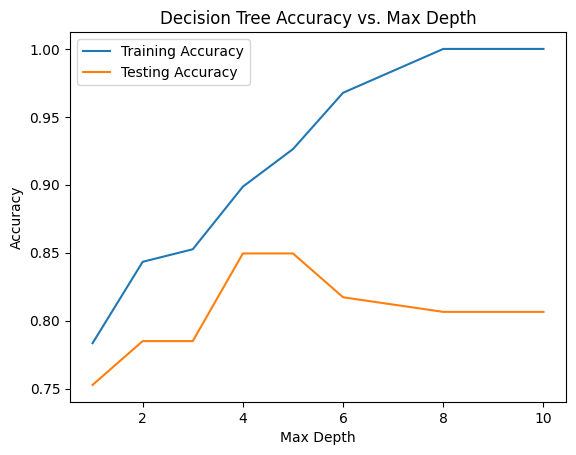

In [5]:

from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,  export_text
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])


le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
X = df.iloc[:, :-1].values
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]
train_accuracies = []
test_accuracies = []

for depth_limit in depth_limits:
    train_acc = 0
    test_acc = 0
    num_runs = 10

    for _ in range(num_runs):
        clf = DecisionTreeClassifier(max_depth=depth_limit, random_state=0)
        clf.fit(X_train, y_train)

        train_acc += clf.score(X_train, y_train)
        test_acc += clf.score(X_test, y_test)

    train_accuracies.append(train_acc / num_runs)
    test_accuracies.append(test_acc / num_runs)

    
plt.plot(depth_limits, train_accuracies, label='Training Accuracy')
plt.plot(depth_limits, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.show()


### 3) [1.5v]

**Comment on the results, including the generalization capacity across settings**

### 4) [2v]

**To deploy the predictor, a healthcare team opted to learn a single decision tree
(random_state=0) using all available data as training data, and further ensuring that each leaf has
a minimum of 20 individuals in order to avoid overfitting risks.**

    i. Plot the decision tree.
    ii. Characterize a hernia condition by identifying the hernia-conditional associations

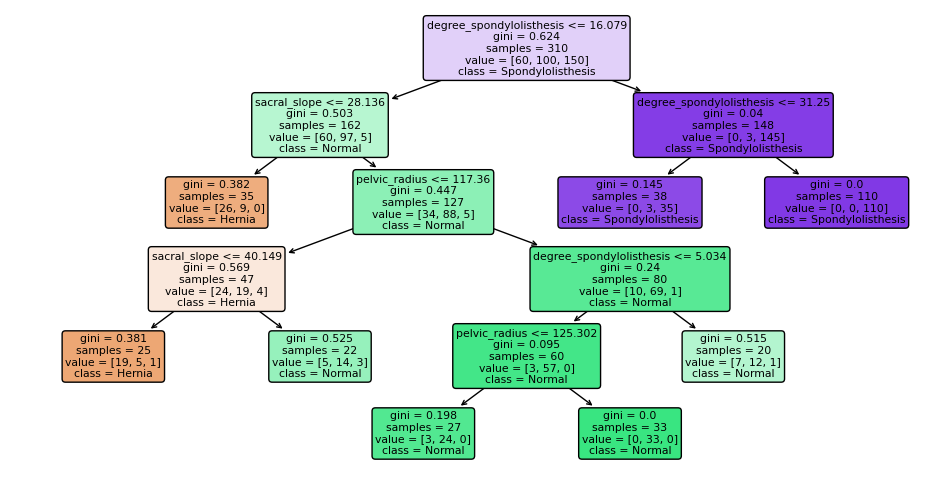

['Hernia' 'Normal' 'Spondylolisthesis']


In [6]:
# i
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

# Load and partition data from column_diagnosis.arff
data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
X = df.iloc[:, :-1].values

# Convert byte strings to regular strings
y_str = df['class'].astype(str)
# Initialize label encoder
le = LabelEncoder()
# Fit label encoder and transform labels
y = le.fit_transform(y_str)

# Learn classifier (Decision Tree) with max depth 3
predictor = tree.DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
predictor.fit(X, y)

# Plot classifier
plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=df.columns[:-1], class_names=le.classes_, filled=True, rounded=True)
plt.show()
print(le.classes_)